In [94]:
import pandas as pd
import csv
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [88]:
North_east_2 = pd.read_csv("North_east_2.csv")
North_east = pd.read_csv("North_east.csv")
North_west_2 = pd.read_csv("North_west_2.csv")
North_west_1 = pd.read_csv("North_west_1.csv")

In [89]:

dfs = [North_east_2, North_east,North_west_2,North_west_1]
df=pd.DataFrame()


for i in dfs:
    df = df.append(i)

data_mean=df.groupby('Datetime').mean()
data_mean.index = pd.to_datetime(data_mean.index)

In [90]:

data_mean.columns

Index(['air_temp_5cm_avg', 'air_temp_5cm_max', 'air_temp_5cm_min',
       'air_temp_avg', 'air_temp_max', 'air_temp_min', 'cloud_cover_avg',
       'cloud_cover_max', 'cloud_cover_min', 'dew_point_avg', 'dew_point_max',
       'dew_point_min', 'ice_acc_period', 'liquid_acc_period',
       'long_wave_radiation_avg', 'long_wave_radiation_max',
       'long_wave_radiation_min', 'pet_period', 'precip_acc_period',
       'precip_acc_period_adjusted', 'precip_acc_period_raw',
       'precip_duration', 'relative_humidity_avg', 'relative_humidity_max',
       'relative_humidity_min', 'short_wave_radiation_avg',
       'short_wave_radiation_max', 'short_wave_radiation_min',
       'snow_acc_period', 'sunshine_duration', 'visibility_avg',
       'visibility_max', 'visibility_min', 'wind_gust_max',
       'wind_speed_2m_avg', 'wind_speed_2m_max', 'wind_speed_2m_min',
       'wind_speed_avg', 'wind_speed_max', 'wind_speed_min'],
      dtype='object')

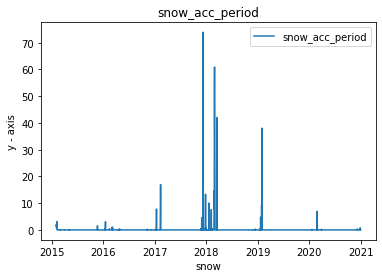

In [157]:

plt.plot(data_mean.index,data_mean['snow_acc_period'],  label = "snow_acc_period")

plt.xlabel('snow')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('snow_acc_period')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

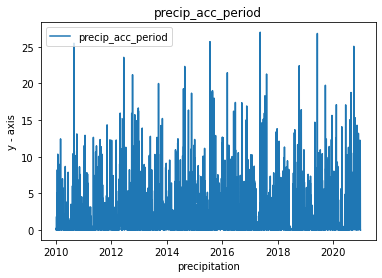

In [158]:

plt.plot(data_mean.index,data_mean['precip_acc_period'],  label = "precip_acc_period")

plt.xlabel('precipitation')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('precip_acc_period')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

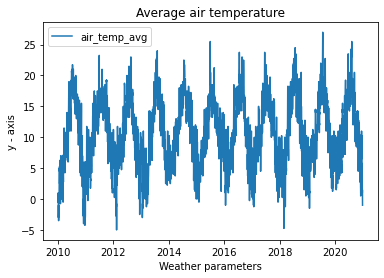

In [146]:
plt.plot(data_mean.index,data_mean['air_temp_avg'],  label = "air_temp_avg")

plt.xlabel('Weather parameters')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Average air temperature')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

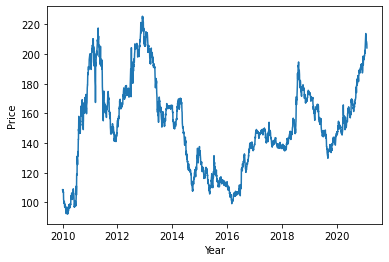

In [135]:
price =  pd.read_csv("UK_Wheat_price.csv")
price['Datetime'] = pd.to_datetime(price['Date'])
price = price.set_index(['Datetime'])
price = price.drop(['Date'], axis=1)


plt.plot(price.index, price.Price)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [92]:
Price = price.groupby(pd.Grouper(freq='10D')).mean()
Price.head()

,Price,Open,High,Low
Datetime,,,,
2010-01-01,107.958333,108.108333,108.108333,108.108333
2010-01-11,103.768750,103.612500,103.612500,103.612500
2010-01-21,99.507143,99.628571,99.707143,99.307143
2010-01-31,97.810000,97.953750,98.122500,97.503750
2010-02-10,94.512500,94.618750,94.756250,94.368750


In [7]:
Price_30d = Price.copy() 
Price_30d['shifted_date']=Price_30d.index + datetime.timedelta(days=-30)
Price_30d.reset_index(inplace = True)
Price_30d = Price_30d.drop(['Datetime'], axis=1)
Price_30d = Price_30d.set_index(['shifted_date'])
Price_30d.rename(columns={'Price':'Price_30d'}, inplace=True)
Price_30d.head()

,Price_30d,Open,High,Low
shifted_date,,,,
2009-12-02,107.958333,108.108333,108.108333,108.108333
2009-12-12,103.768750,103.612500,103.612500,103.612500
2009-12-22,99.507143,99.628571,99.707143,99.307143
2010-01-01,97.810000,97.953750,98.122500,97.503750
2010-01-11,94.512500,94.618750,94.756250,94.368750


In [124]:
result = pd.concat([Price, Price_30d], axis=1).reindex(Price.index)
result = result.iloc[:, result.columns.isin(['Price_30d','Price'])]
result.head()

,Price,Price_30d
Datetime,,
2010-01-01,107.958333,97.810000
2010-01-11,103.768750,94.512500
2010-01-21,99.507143,94.033333
2010-01-31,97.810000,93.987500
2010-02-10,94.512500,93.516667


In [153]:

from sklearn.metrics import mean_absolute_error

def rf_r2score(dataset):
    X =dataset[dataset.columns[~dataset.columns.isin(['Price_30d'])]].values
    y = dataset.iloc[:, dataset.columns.isin(['Price_30d'])].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

    rf_exp = RandomForestRegressor(n_estimators= 200, random_state=1000)
    rf_exp.fit(X_train, y_train)

    y_pred = rf_exp.predict(X_test)
    print("R2: ",r2_score(y_test,y_pred))
    
    print('Mean Absolute Erro:', mean_absolute_error(y_test, y_pred))
    
    

In [154]:
data_copy = data_mean.copy()

data_copy['frost_days'] = data_mean[data_mean.air_temp_min<0 ]['air_temp_min']
data_copy['ice_days'] = data_mean[data_mean.air_temp_max<0 ]['air_temp_max']
data_copy['tem_10_25'] = data_mean[(10<data_mean.air_temp_avg)&(data_mean.air_temp_avg<25) ]['air_temp_avg']
data_copy['wet_days'] = data_mean[data_mean.precip_acc_period>1 ]['precip_acc_period']
data_copy['very_heavy_precip_days'] = data_mean[data_mean.precip_acc_period>20 ]['precip_acc_period']
data_copy['heavy_precip_days'] = data_mean[data_mean.precip_acc_period>10 ]['precip_acc_period']
data_copy['Summer_days'] = data_mean[data_mean.air_temp_max>25 ]['air_temp_max']
data_copy['tropical_nights'] = data_mean[data_mean.air_temp_min>20 ]['air_temp_min']
data_copy['sunshine'] = data_mean[(data_mean.sunshine_duration>10) ]['sunshine_duration']

data_1 = data_copy.groupby(pd.Grouper(freq='10D')).agg({'frost_days':'count', 
                                               'ice_days':'count',
                                               'wind_gust_max':'sum',
                                                'snow_acc_period':'sum', 
                                                'ice_acc_period':'sum',
                                                'dew_point_min':['min','mean'],  
                                                  
                                               'heavy_precip_days':'count',                                          
                                                'cloud_cover_avg':'sum',                    
                                              'sunshine_duration':'sum',
                                              'visibility_max':'sum',                
                                              'visibility_avg':'sum',
                                            'relative_humidity_avg':['mean','max'],'relative_humidity_min':['min','max','mean'],
                                            'relative_humidity_max':['max','min','mean'],
                                             'wind_speed_max':'min','wind_speed_min':'mean','wind_speed_avg':'max',
                                              'air_temp_max':['max','min','mean'],'air_temp_min':['min','max','mean'],
                                            
                                                         
                                            
                         })

winter =data_1.loc[(data_1.index.month.isin([ 1, 2]))]
winter_price = result.loc[(result.index.month.isin([  1, 2]))]
winter = pd.concat([winter, winter_price['Price_30d']], axis=1).reindex(winter.index)
print(winter.corrwith(winter_price['Price_30d'],method = 'spearman'))
print(rf_r2score(winter_data))

frost_days             count   -0.129246
ice_days               count    0.012582
wind_gust_max          sum     -0.466316
snow_acc_period        sum     -0.336159
ice_acc_period         sum     -0.159669
dew_point_min          min      0.169262
                       mean     0.211319
heavy_precip_days      count   -0.064797
cloud_cover_avg        sum      0.580751
sunshine_duration      sum      0.178530
visibility_max         sum     -0.344856
visibility_avg         sum     -0.378631
relative_humidity_avg  mean    -0.071091
                       max     -0.103240
relative_humidity_min  min      0.021688
                       max     -0.014384
                       mean    -0.002142
relative_humidity_max  max     -0.051598
                       min     -0.166689
                       mean    -0.157681
wind_speed_max         min      0.049934
wind_speed_min         mean     0.096116
wind_speed_avg         max      0.007782
air_temp_max           max      0.309794
                

<ipython-input-153-d1e3310dd3eb>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_exp.fit(X_train, y_train)


In [247]:
data_spring = data_copy.groupby(pd.Grouper(freq='10D')).agg({
                                               'wind_gust_max':'sum',
                                               'heavy_precip_days':'count',
                                               'Summer_days':'count',
                                               'wet_days':'count',
                                              'cloud_cover_avg':'sum',
                                                'ice_days':'count',                                         
                                                'snow_acc_period':'sum', 
                                            'dew_point_min':['min','mean'],
                                              'visibility_max':'sum',                
                                              'visibility_avg':'sum',
  
                                              'wind_speed_max':['mean','max'],'wind_speed_min':['max'],'wind_speed_avg':['max'],
                                              'air_temp_max':['max','min','mean'],'air_temp_min':['max','min','mean'],
                                              'air_temp_avg':'mean'
                         })

spring =data_spring.loc[(data_spring.index.month.isin([3,4]))]
spring_price = result.loc[(result.index.month.isin([3,4]))]
spring_data = pd.concat([spring, spring_price['Price_30d']], axis=1).reindex(spring.index)
print(spring.corrwith(spring_price['Price_30d'],method = 'spearman'))
print(rf_r2score(spring_data))



wind_gust_max      sum     -0.464383
heavy_precip_days  count   -0.013181
Summer_days        count    0.107630
wet_days           count   -0.084882
cloud_cover_avg    sum      0.354548
ice_days           count   -0.071580
snow_acc_period    sum     -0.166032
dew_point_min      min     -0.036837
                   mean     0.043138
visibility_max     sum     -0.410867
visibility_avg     sum     -0.378730
wind_speed_max     mean    -0.003378
                   max      0.103354
wind_speed_min     max      0.139957
wind_speed_avg     max      0.142853
air_temp_max       max      0.067258
                   min      0.078456
                   mean     0.055811
air_temp_min       max      0.129307
                   min     -0.047371
                   mean     0.019793
air_temp_avg       mean     0.027028
dtype: float64


<ipython-input-153-d1e3310dd3eb>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_exp.fit(X_train, y_train)


R2:  0.6862789178755426
Mean Absolute Erro: 15.383304861111128
None


In [248]:
data_summer = data_copy.groupby(pd.Grouper(freq='10D')).agg({           
                                               
                                               'wet_days':'count',
                                              'cloud_cover_avg':'sum',                                                     
                                                'snow_acc_period':'sum', 
                                            'dew_point_min':['min'],  'dew_point_max':['min','mean'],'dew_point_avg':['min'],                            
                                               'tem_10_25':'count',
                                               'wind_gust_max':'sum',
                                               'heavy_precip_days':'count',
                                               'Summer_days':'count',
   
                                               'precip_acc_period':'sum',
                                            'relative_humidity_avg':['mean'],'relative_humidity_min':['min','mean'],
                                            'relative_humidity_max':['max','min'],
                                            'wind_speed_max':['mean','max'],'wind_speed_min':['max'],'wind_speed_avg':['mean'],
                                              'air_temp_max':['max','min','mean'],'air_temp_min':['max','min','mean'],
                                              'air_temp_avg':'mean'
                         })



summer =data_summer.loc[(data_summer.index.month.isin([6,7]))]
summer_price = result.loc[(result.index.month.isin([6,7]))]
summer_data = pd.concat([summer, summer_price['Price_30d']], axis=1).reindex(summer.index)
print(summer.corrwith(summer_price['Price_30d'],method = 'spearman'))
print(rf_r2score(summer_data))




/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
<ipython-input-153-d1e3310dd3eb>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_exp.fit(X_train, y_train)


wet_days               count    0.001581
cloud_cover_avg        sum      0.109945
snow_acc_period        sum           NaN
dew_point_min          min     -0.301506
dew_point_max          min     -0.190185
                       mean    -0.189595
dew_point_avg          min     -0.241905
tem_10_25              count    0.227187
wind_gust_max          sum     -0.299266
heavy_precip_days      count    0.043445
Summer_days            count    0.122392
precip_acc_period      sum     -0.019100
relative_humidity_avg  mean    -0.068115
relative_humidity_min  min     -0.115856
                       mean    -0.085691
relative_humidity_max  max     -0.027547
                       min     -0.037297
wind_speed_max         mean     0.144499
                       max      0.152590
wind_speed_min         max      0.056186
wind_speed_avg         mean     0.110416
air_temp_max           max      0.027277
                       min     -0.015899
                       mean    -0.015678
air_temp_min    

In [13]:
corr = data_mean.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,air_temp_5cm_avg,air_temp_5cm_max,air_temp_5cm_min,air_temp_avg,air_temp_max,air_temp_min,cloud_cover_avg,cloud_cover_max,cloud_cover_min,dew_point_avg,dew_point_max,dew_point_min,ice_acc_period,liquid_acc_period,long_wave_radiation_avg,long_wave_radiation_max,long_wave_radiation_min,pet_period,precip_acc_period,precip_acc_period_adjusted,precip_acc_period_raw,precip_duration,relative_humidity_avg,relative_humidity_max,relative_humidity_min,short_wave_radiation_avg,short_wave_radiation_max,short_wave_radiation_min,snow_acc_period,sunshine_duration,visibility_avg,visibility_max,visibility_min,wind_gust_max,wind_speed_2m_avg,wind_speed_2m_max,wind_speed_2m_min,wind_speed_avg,wind_speed_max,wind_speed_min
air_temp_5cm_avg,1.000000,0.961699,0.923621,0.997304,0.969390,0.943981,-0.117371,-0.087962,-0.095268,0.923336,0.912396,0.903040,-0.054123,-0.001516,nan,nan,nan,0.755613,0.003895,0.003895,-0.002060,-0.056596,-0.444722,-0.174785,-0.466810,nan,nan,nan,-0.163586,0.485363,0.259679,0.171361,0.224601,-0.107908,-0.066798,-0.062407,-0.101637,-0.066558,-0.062493,-0.102608
air_temp_5cm_max,0.961699,1.000000,0.803251,0.958762,0.992945,0.836580,-0.305887,-0.217048,-0.241521,0.825220,0.828869,0.797300,-0.043895,-0.095189,nan,nan,nan,0.843288,-0.087869,-0.087869,-0.091666,-0.169471,-0.570236,-0.214022,-0.619820,nan,nan,nan,-0.161889,0.655475,0.274092,0.177084,0.257472,-0.199745,-0.184759,-0.156619,-0.220661,-0.184921,-0.156384,-0.221545
air_temp_5cm_min,0.923621,0.803251,1.000000,0.922263,0.826134,0.990234,0.120357,0.072689,0.103930,0.941733,0.903970,0.952467,-0.049790,0.114302,nan,nan,nan,0.533875,0.114557,0.114557,0.105691,0.079726,-0.211710,-0.090999,-0.216953,nan,nan,nan,-0.143605,0.209472,0.187097,0.130833,0.136384,-0.001788,0.071921,0.039756,0.067857,0.072575,0.039455,0.066736
air_temp_avg,0.997304,0.958762,0.922263,1.000000,0.971216,0.945288,-0.120920,-0.094838,-0.098615,0.928054,0.918536,0.905539,-0.055750,-0.004860,nan,nan,nan,0.742687,0.001699,0.001699,-0.004829,-0.060748,-0.437782,-0.174879,-0.457271,nan,nan,nan,-0.173688,0.471092,0.260837,0.175336,0.224755,-0.097355,-0.060959,-0.054944,-0.098525,-0.060765,-0.054999,-0.099624
air_temp_max,0.969390,0.992945,0.826134,0.971216,1.000000,0.856138,-0.279217,-0.205044,-0.219396,0.851276,0.858992,0.817965,-0.042619,-0.079706,nan,nan,nan,0.816975,-0.070914,-0.070914,-0.075710,-0.152441,-0.540308,-0.200747,-0.585408,nan,nan,nan,-0.167619,0.607074,0.273661,0.183786,0.250185,-0.151615,-0.144541,-0.114909,-0.190398,-0.144642,-0.114639,-0.191359
air_temp_min,0.943981,0.836580,0.990234,0.945288,0.856138,1.000000,0.079945,0.046047,0.064912,0.948054,0.911340,0.957681,-0.055048,0.090036,nan,nan,nan,0.573915,0.091913,0.091913,0.083384,0.054233,-0.257325,-0.119296,-0.260723,nan,nan,nan,-0.158590,0.259231,0.201899,0.137956,0.155861,-0.027306,0.043891,0.015914,0.037065,0.044313,0.015692,0.035885
cloud_cover_avg,-0.117371,-0.305887,0.120357,-0.120920,-0.279217,0.079945,1.000000,0.669597,0.753563,0.117857,0.076043,0.128693,0.032525,0.322703,nan,nan,nan,-0.473392,0.309619,0.309619,0.315646,0.402568,0.582408,0.274788,0.640909,nan,nan,nan,0.095661,-0.727168,-0.343557,-0.190641,-0.401327,0.191628,0.201044,0.143957,0.221873,0.202522,0.142671,0.220349
cloud_cover_max,-0.087962,-0.217048,0.072689,-0.094838,-0.205044,0.046047,0.669597,1.000000,0.298429,0.076095,0.065549,0.079004,0.018810,0.214936,nan,nan,nan,-0.331739,0.187540,0.187540,0.190299,0.248548,0.398436,0.207944,0.414498,nan,nan,nan,0.036559,-0.495281,-0.180682,-0.084587,-0.259816,0.159526,0.158586,0.136121,0.146386,0.159835,0.135478,0.146017
cloud_cover_min,-0.095268,-0.241521,0.103930,-0.098615,-0.219396,0.064912,0.753563,0.298429,1.000000,0.083210,0.024075,0.118426,0.036311,0.221554,nan,nan,nan,-0.348031,0.214486,0.214486,0.223267,0.282133,0.465715,0.224225,0.533424,nan,nan,nan,0.142677,-0.519016,-0.395787,-0.259660,-0.352645,0.123435,0.109413,0.041950,0.168460,0.110530,0.040801,0.167050
dew_point_avg,0.923336,0.825220,0.941733,0.928054,0.851276,0.948

In [14]:
from keras.models import Sequential
from keras.layers import Dense
   

In [188]:
X =winter_data[winter_data.columns[~winter_data.columns.isin(['Price_30d'])]]
y = winter_data.iloc[:, winter_data.columns.isin(['Price_30d'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
rf_exp = RandomForestRegressor(n_estimators= 200, random_state=1000)
rf_exp.fit(X_train, y_train)

y_pred = rf_exp.predict(X_test)
print("R2: ",r2_score(y_test['Price_30d'],y_pred))
    
print('Mean Absolute Erro:', mean_absolute_error(y_test, y_pred))

<ipython-input-188-4d5234fab606>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_exp.fit(X_train, y_train)


R2:  0.7430947130753132
Mean Absolute Erro: 15.61906947916665


In [193]:
def plot_pred_vs_obs (df,f1,f2): 
    color=['b','g']
    marker=['*','s']
    linewidth = 1.8
    fig = plt.gcf()
    fig.set_size_inches(8, 6)

    ax = df[f1].plot(linewidth=linewidth, marker=marker[0], color=color[0])
    df[f2].plot(linewidth=linewidth, marker=marker[1], color=color[1])
  
    plt.legend(loc='best')    
    plt.show()


In [185]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [182]:
ab = AdaBoostRegressor(n_estimators=20) # n_estimators is the number of trees in the forest
ab.fit(X_train,y_train)
y_pred_ab = ab.predict(X_test)

r2_score(y_test['Price_30d'],y_pred_ab)

/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8112668868162682

In [189]:
print('Mean Absolute Erro:', mean_absolute_error(y_test['Price_30d'],y_pred_ab))

Mean Absolute Erro: 11.429112112826248


In [196]:
y_test['predict']=pd.Series()
y_test['ab_predict']=pd.Series()
for i in range(len(y_pred)):
    y_test['predict'][i] = y_pred[i]
    y_test['ab_predict'][i] = y_pred_ab[i]

<ipython-input-196-3fa3bf347ceb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test['predict']=pd.Series()
<ipython-input-196-3fa3bf347ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predict']=pd.Series()
<ipython-input-196-3fa3bf347ceb>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test['ab_predict']=pd.Series()
<ipython-input-196-3fa3bf347ceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

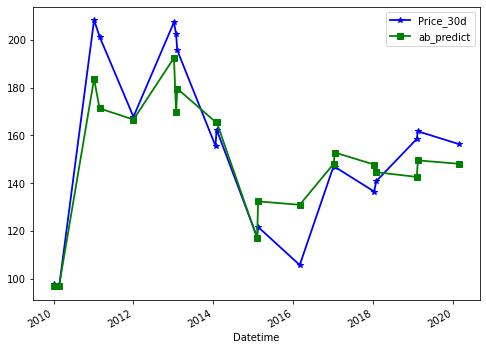

In [197]:
plot_pred_vs_obs(y_test,'Price_30d','ab_predict' )



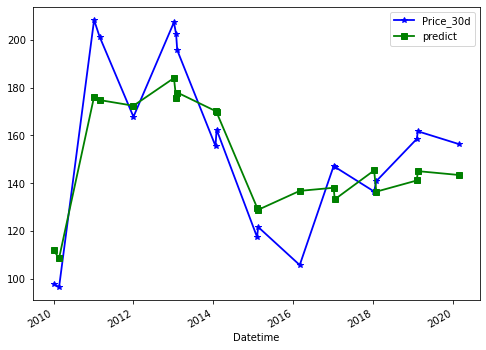

In [198]:
plot_pred_vs_obs(y_test,'Price_30d','predict' )

In [202]:
gb = GradientBoostingRegressor(n_estimators=55,max_depth=1, random_state=0) # n_estimators is the number of trees in the forest
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print('r2: ',r2_score(y_test['Price_30d'],y_pred_gb))
print('Mean Absolute Erro:', mean_absolute_error(y_test['Price_30d'],y_pred_gb))

r2:  0.6515768264136057
Mean Absolute Erro: 17.091942164864417


/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<ipython-input-203-9c6a89fa61db>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test['y_pred_gb']=pd.Series()
<ipython-input-203-9c6a89fa61db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['y_pred_gb']=pd.Series()
/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


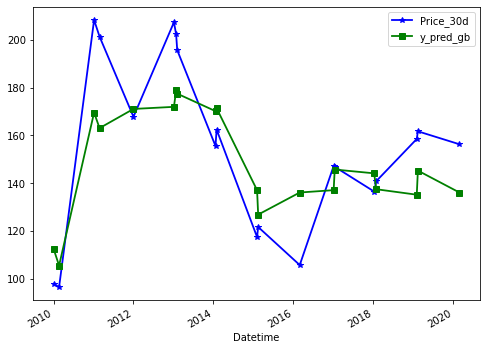

In [203]:
y_test['y_pred_gb']=pd.Series()
for i in range(len(y_pred)):
    y_test['y_pred_gb'][i] = y_pred_gb[i]
plot_pred_vs_obs(y_test,'Price_30d','y_pred_gb' )

In [249]:
model = Sequential() # create model
model.add(Dense(units=100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 29)) # hidden layer
model.add(Dense(units=100,kernel_initializer = 'uniform', activation = 'relu')) # output layer

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model_fitted=model.fit(X_train, y_train, batch_size = 16, epochs = 100)
pre = model.predict(X_test)
print('r2:',r2_score(y_test['Price_30d'],pre))
print('Mean Absolute Erro:', mean_absolute_error(y_test['Price_30d'],pre))

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 148.5735 - mean_absolute_error: 148.5735
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 141.5585 - mean_absolute_error: 141.5585
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 134.2889 - mean_absolute_error: 134.2889
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 129.6328 - mean_absolute_error: 129.6328
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 116.8376 - mean_absolute_error: 116.8376
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 105.0528 - mean_absolute_error: 105.0528
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 96.6560 - mean_absolute_error: 96.6560
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 88.0694 - mean_absolute_error: 88.0694
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 65.4181 - mean_absolute_error: 65.418

3/3 [==============================] - 0s 2ms/step - loss: 14.4914 - mean_absolute_error: 14.4914
Epoch 75/100
3/3 [==============================] - 0s 1ms/step - loss: 14.1979 - mean_absolute_error: 14.1979
Epoch 76/100
3/3 [==============================] - 0s 1ms/step - loss: 12.8931 - mean_absolute_error: 12.8931
Epoch 77/100
3/3 [==============================] - 0s 1ms/step - loss: 14.0505 - mean_absolute_error: 14.0505
Epoch 78/100
3/3 [==============================] - 0s 1ms/step - loss: 14.0361 - mean_absolute_error: 14.0361
Epoch 79/100
3/3 [==============================] - 0s 1ms/step - loss: 15.0041 - mean_absolute_error: 15.0041
Epoch 80/100
3/3 [==============================] - 0s 1ms/step - loss: 11.8097 - mean_absolute_error: 11.8097
Epoch 81/100
3/3 [==============================] - 0s 1ms/step - loss: 14.8334 - mean_absolute_error: 14.8334
Epoch 82/100
3/3 [==============================] - 0s 1ms/step - loss: 13.2906 - mean_absolute_error: 13.2906
Epoch 83/100
3

<ipython-input-244-3d5fcf855a32>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_test['pre']=pd.Series()
<ipython-input-244-3d5fcf855a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pre']=pd.Series()
/Users/yihangu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


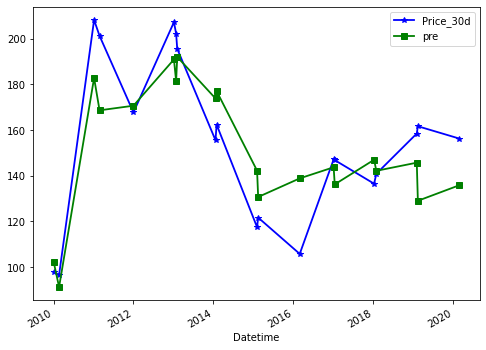

In [244]:
y_test['pre']=pd.Series()
for i in range(len(y_pred)):
    y_test['pre'][i] = pre[i]
plot_pred_vs_obs(y_test,'Price_30d','pre' )

In [245]:
y_test

,Price_30d,predict,ab_predict,y_pred_gb,pre
Datetime,,,,,
2017-01-04,147.150000,138.060808,148.078912,137.058071,143.697006
2015-02-04,117.441667,129.752307,116.931250,137.058071,142.204803
2012-01-01,167.743750,172.380522,166.593036,171.033705,170.672073
2019-02-03,158.481250,141.099942,142.598214,135.152952,145.706589
2019-02-13,161.675000,145.010343,149.495387,145.235588,129.000595
2014-01-20,155.537500,170.162376,165.609441,170.114055,173.856369
2015-02-14,121.643750,128.848858,132.350721,126.831984,130.667480
2010-02-20,96.525000,108.633424,97.016915,105.492470,91.198364
2011-02-25,201.300000,174.753742,171.257341,163.009559,168.655502
